In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv(r'D:/Data/Algorithms/DATA/rock_density_xray.csv')

In [27]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [28]:
df.columns = ['Signal','Density']

In [29]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='Signal', ylabel='Density'>

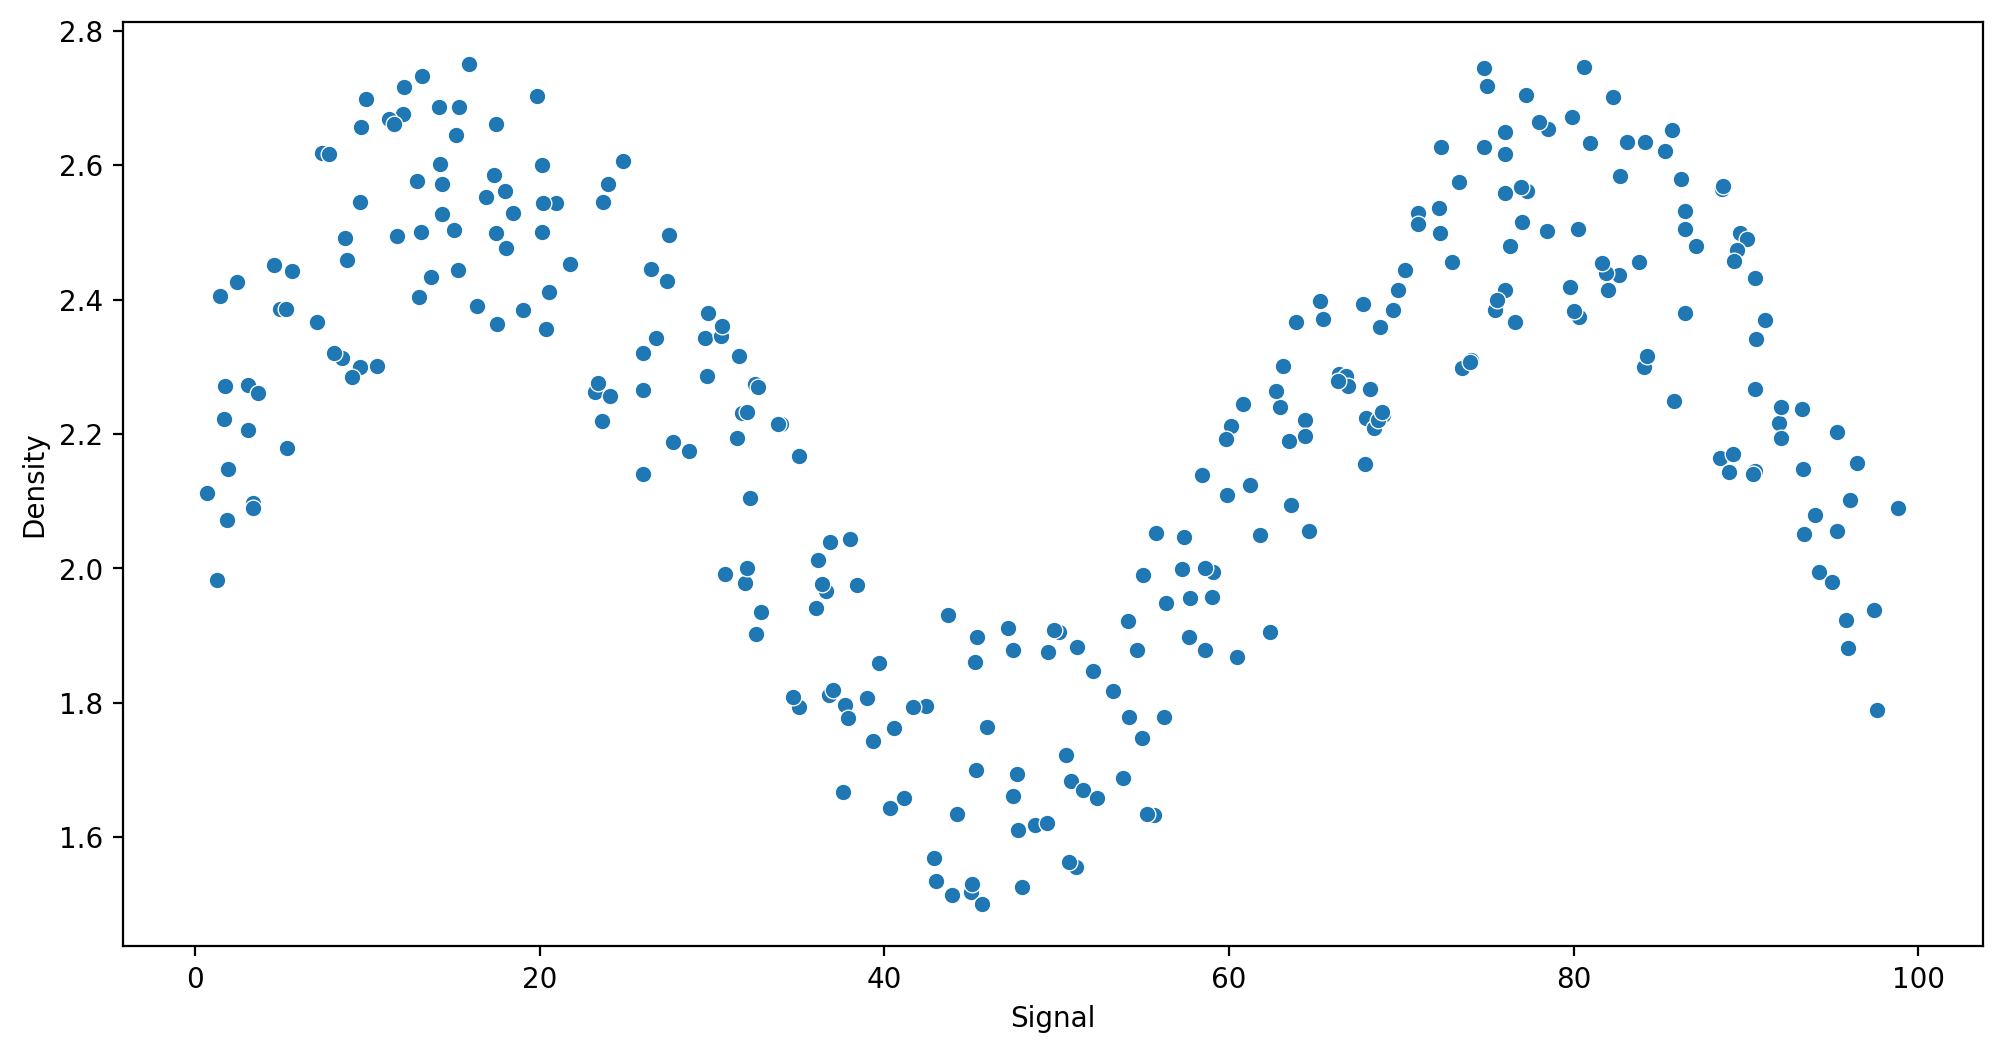

In [30]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

# Splitting data

In [109]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [110]:
X

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708],
       [89.64797256],
       [69.49273293],
       [20.15052036],
       [82.25633703],
       [64.42480217],
       [38.42706534],
       [ 9.89157994],
       [31.7410984 ],
       [90.4960676 ],
       [13.19342555],
       [ 9.55665673],
       [26.00550577],
       [24.81782725],
       [40.29631043],
       [29.60926638],
       [76.57740035],
       [82.61598742],
       [ 1.66229161],
       [17.32519267],
       [35.05157441],
       [63.47748521],
       [13.68823691],
       [17.49779896],
       [ 1.86382485],
       [17.96684624],
       [23.9388581 ],
       [66.36433682],
       [34.02717884],
       [76.03302052],
       [82.66759709],
       [66.78076834],
       [47.4528517 ],
       [74.02752794],
       [86.20473574],
       [72.24767039],
       [80.33899095],
       [36.86719496],
       [31.92883259],
       [85.68535822],
       [78.45459768],
       [19

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Random Forest Regresion

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [114]:
rfs = RandomForestRegressor()

In [115]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print('RMSE : {}'.format(rmse))
    
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,6),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [116]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimato

In [117]:
params = {'n_estimators':[10,20,40,64,100,128,150,200]}

In [118]:
grid = GridSearchCV(rfs,params)
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 20, 40, 64, 100, 128, 150, 200]})

In [119]:
grid.best_params_

{'n_estimators': 40}

RMSE : 0.14587382331311063


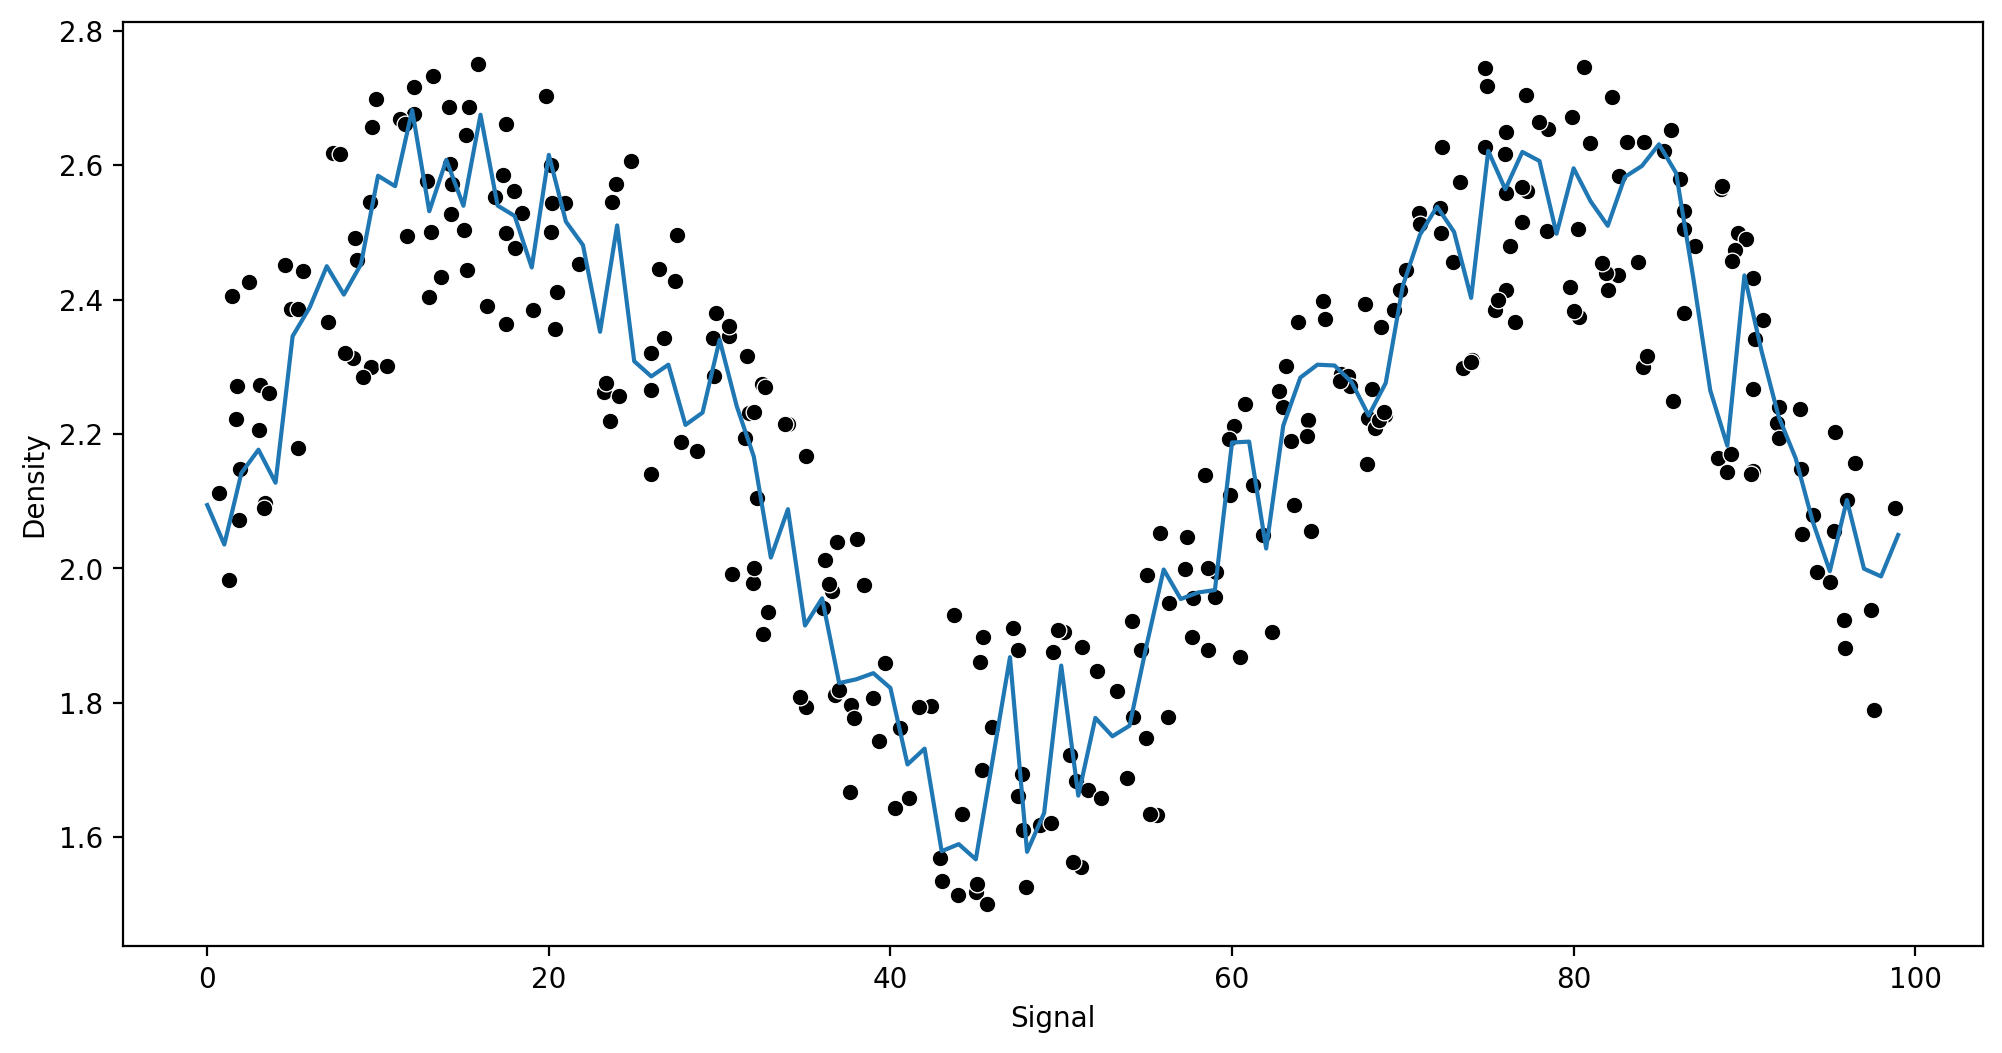

In [120]:
rfs = RandomForestRegressor(n_estimators=100)
run_model(rfs,X_train,y_train,X_test,y_test)

# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

RMSE : 0.287963149359294


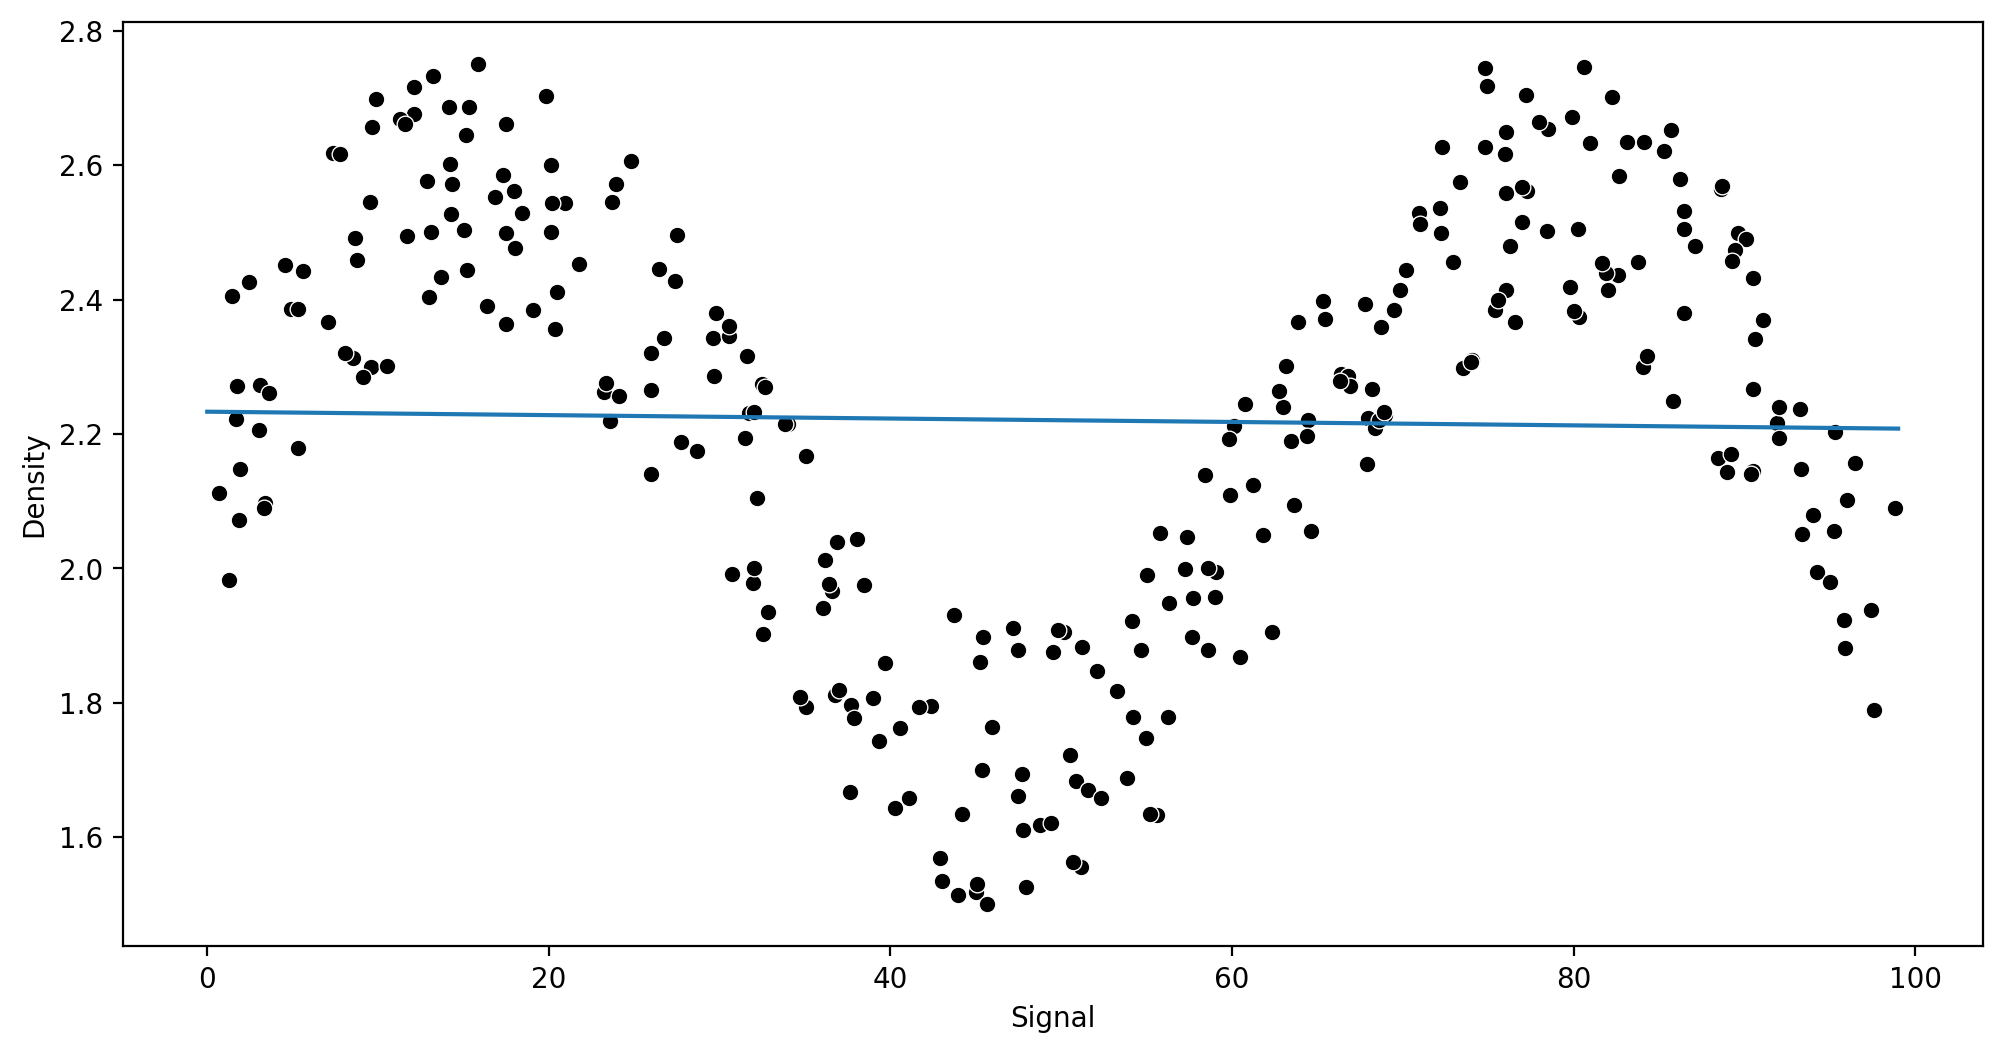

In [56]:
run_model(model,X_train,y_train,X_test,y_test)

# Polynomial Regression

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [59]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2843560375110662


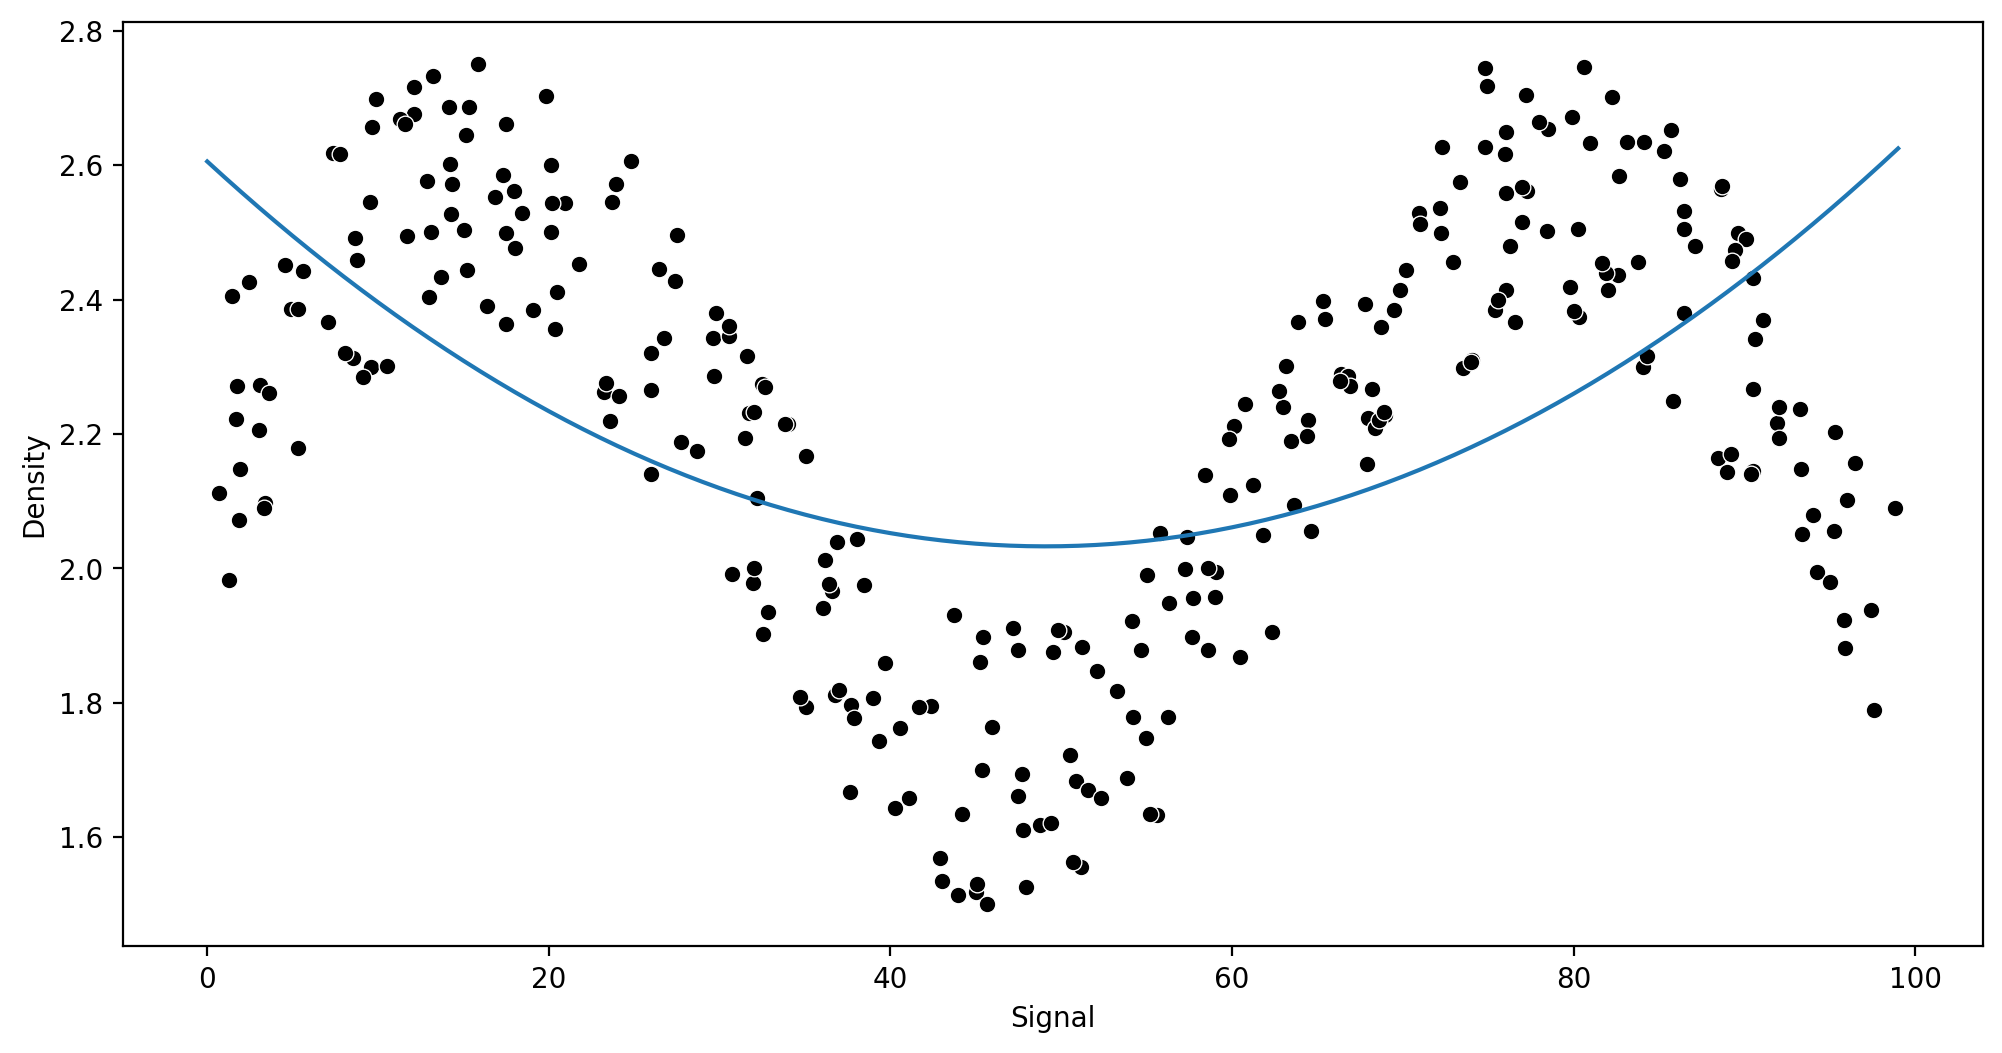

In [60]:
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14454787186356538


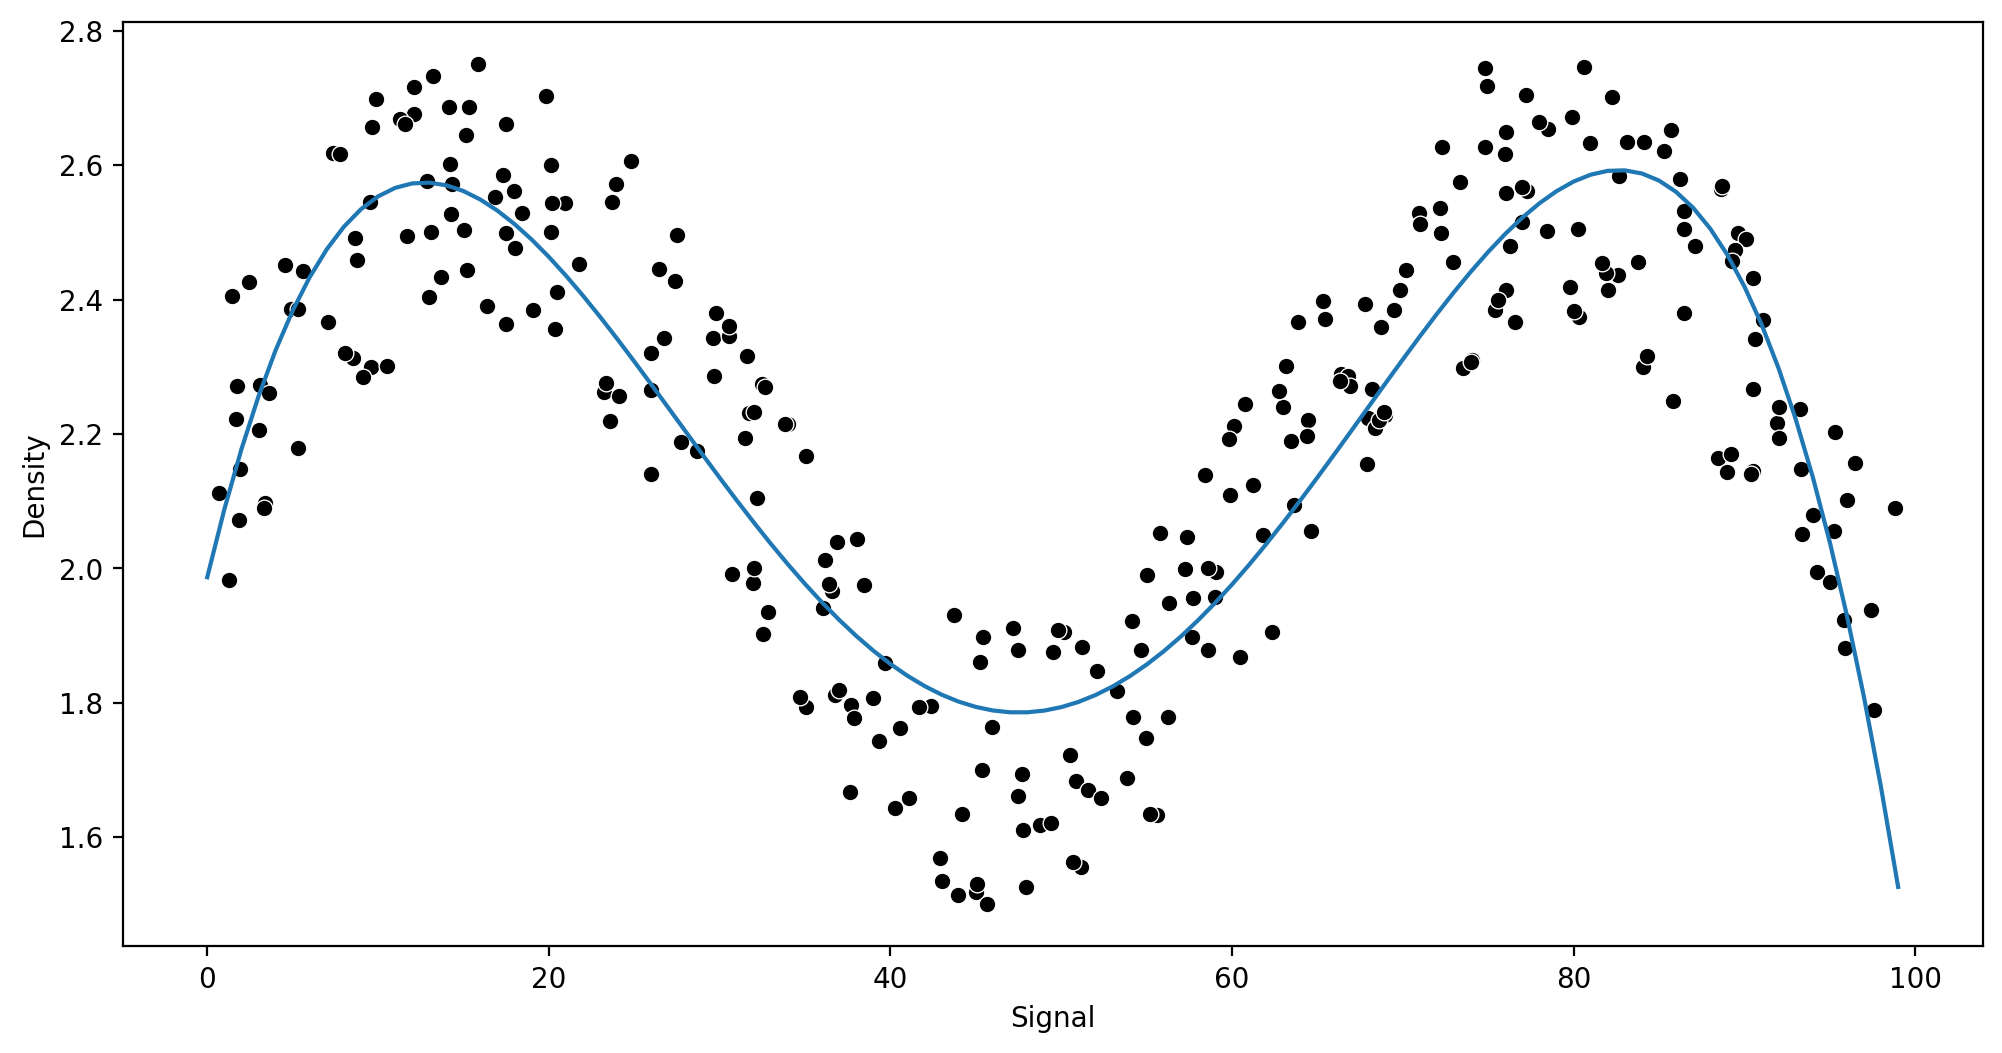

In [67]:
pipe = make_pipeline(PolynomialFeatures(4),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.1336831671065428


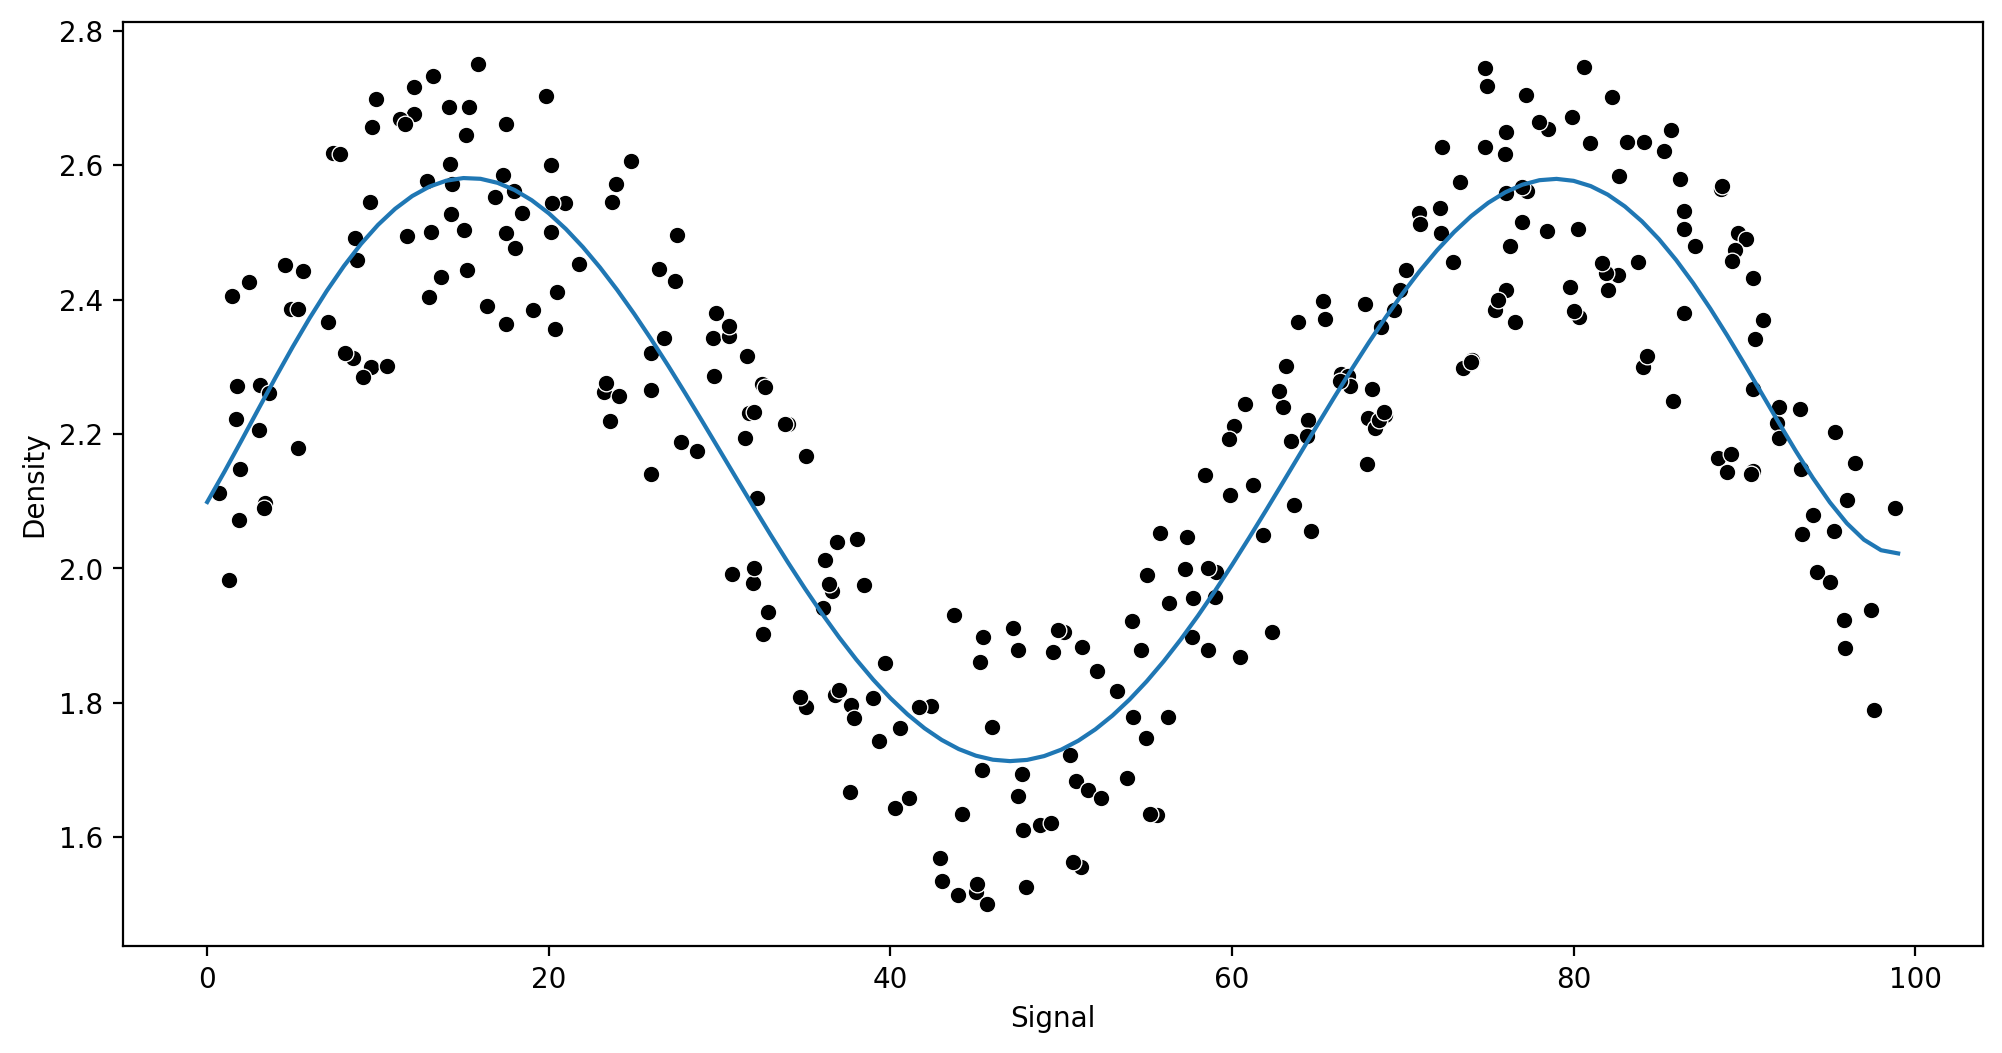

In [68]:
pipe = make_pipeline(PolynomialFeatures(6),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

This can work but we can't say for signals which are greater than 100

# KNN Regression

In [69]:
from sklearn.neighbors import KNeighborsRegressor 

RMSE : 0.14616406915447702
RMSE : 0.14036870465969134
RMSE : 0.14031560262333984


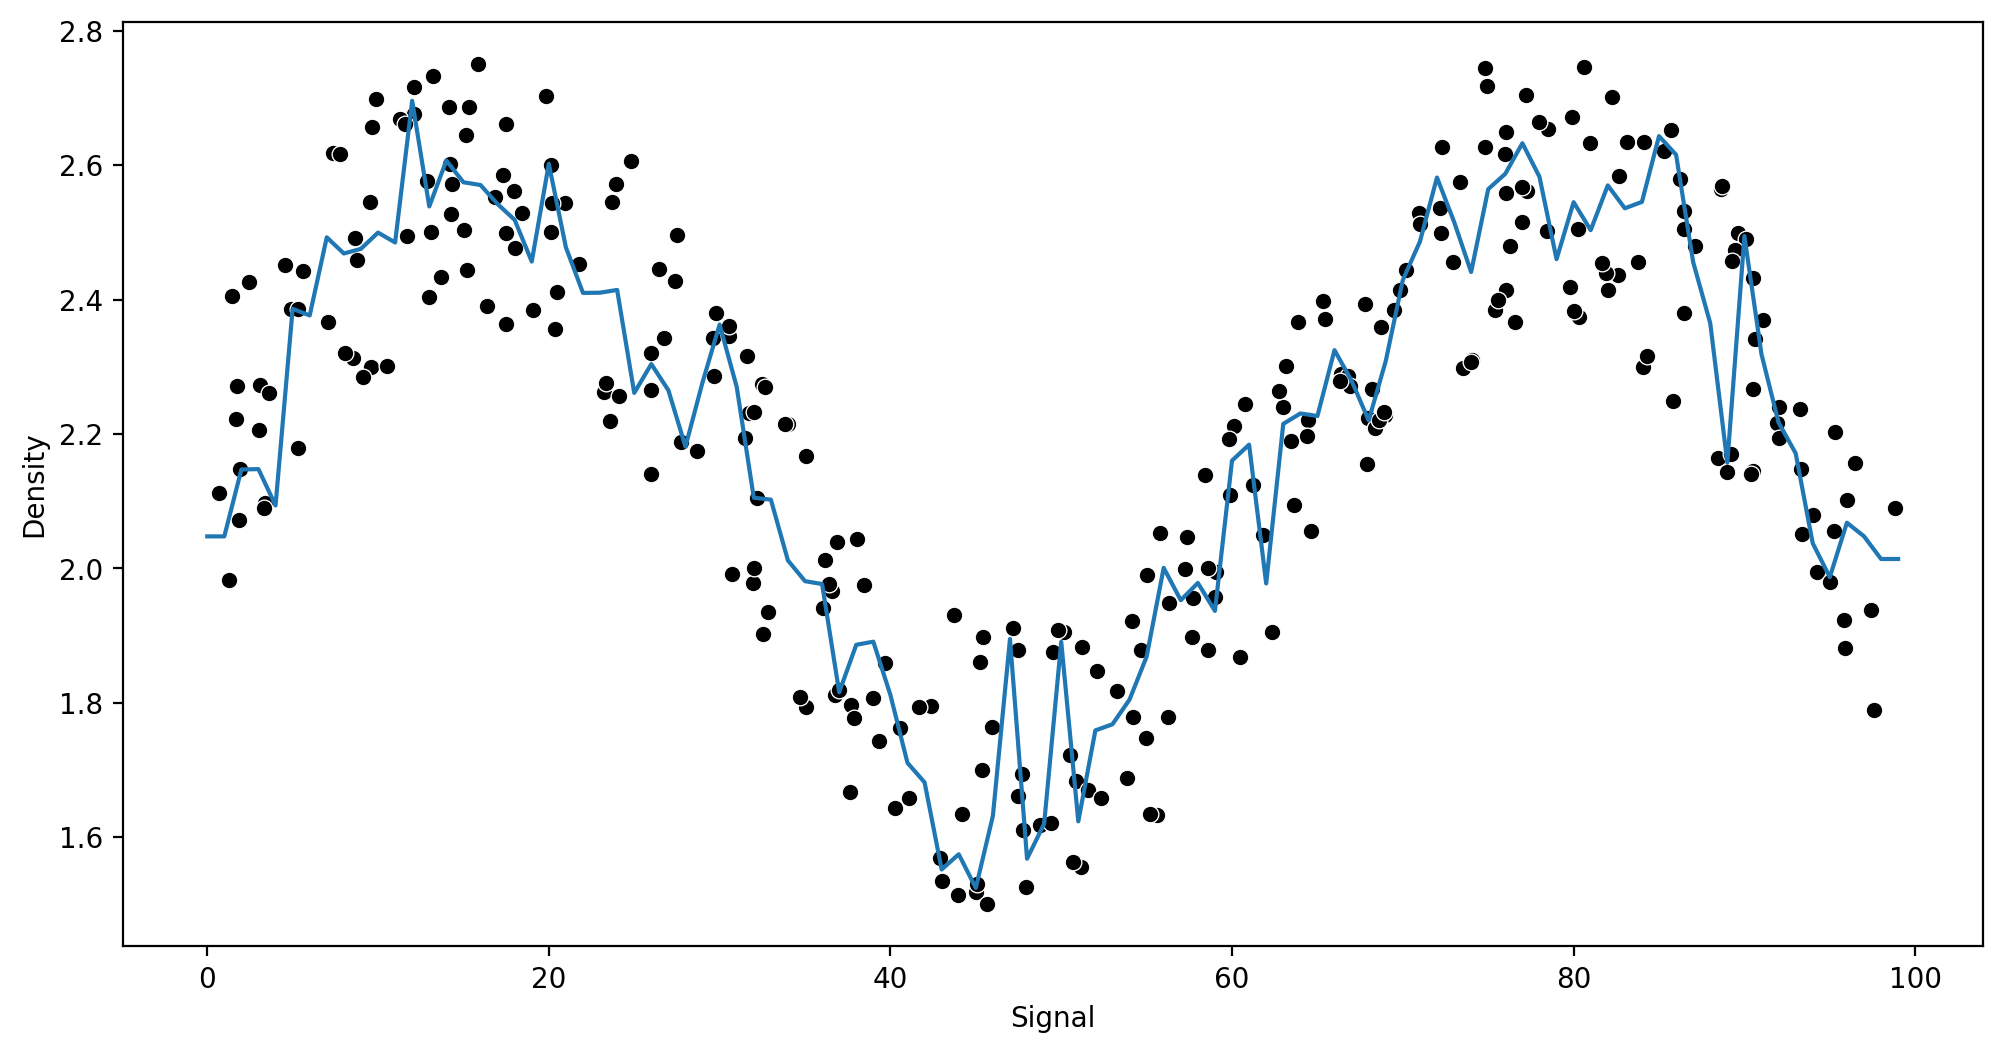

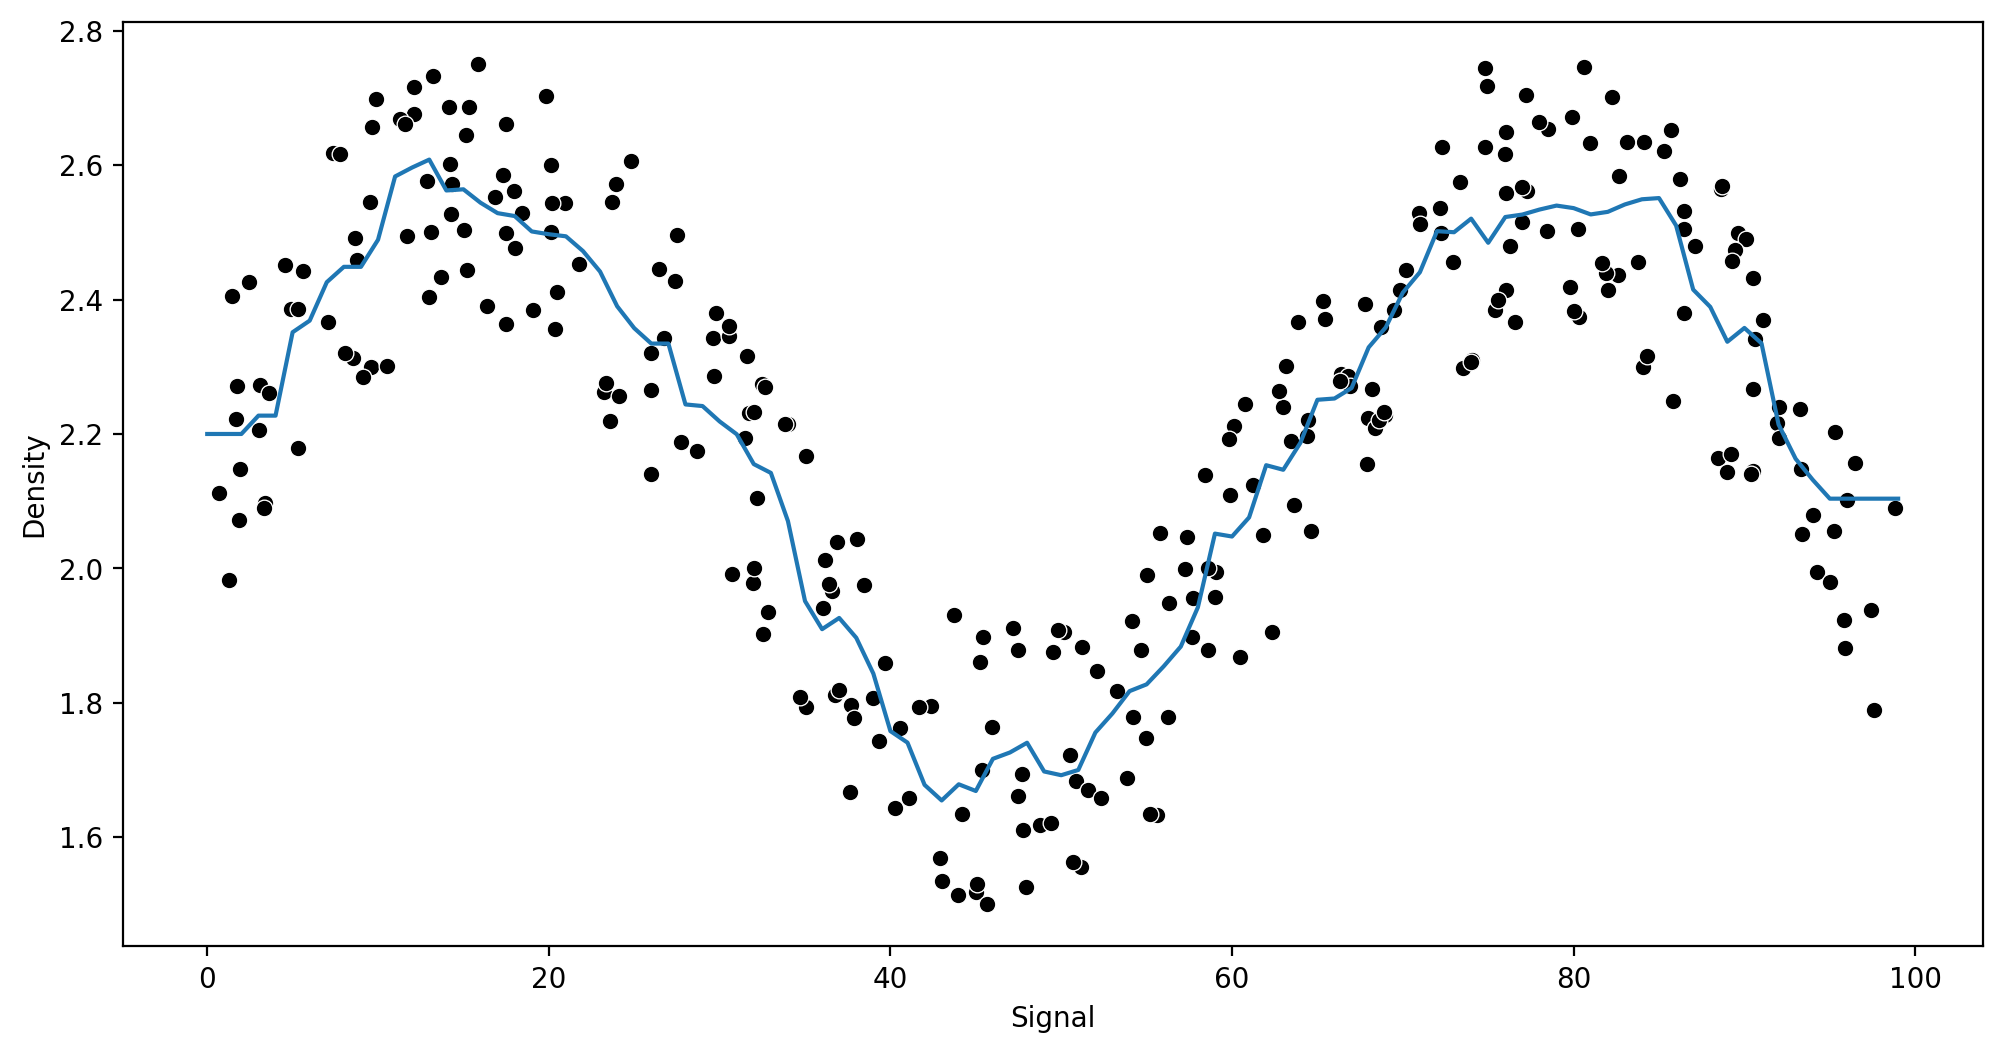

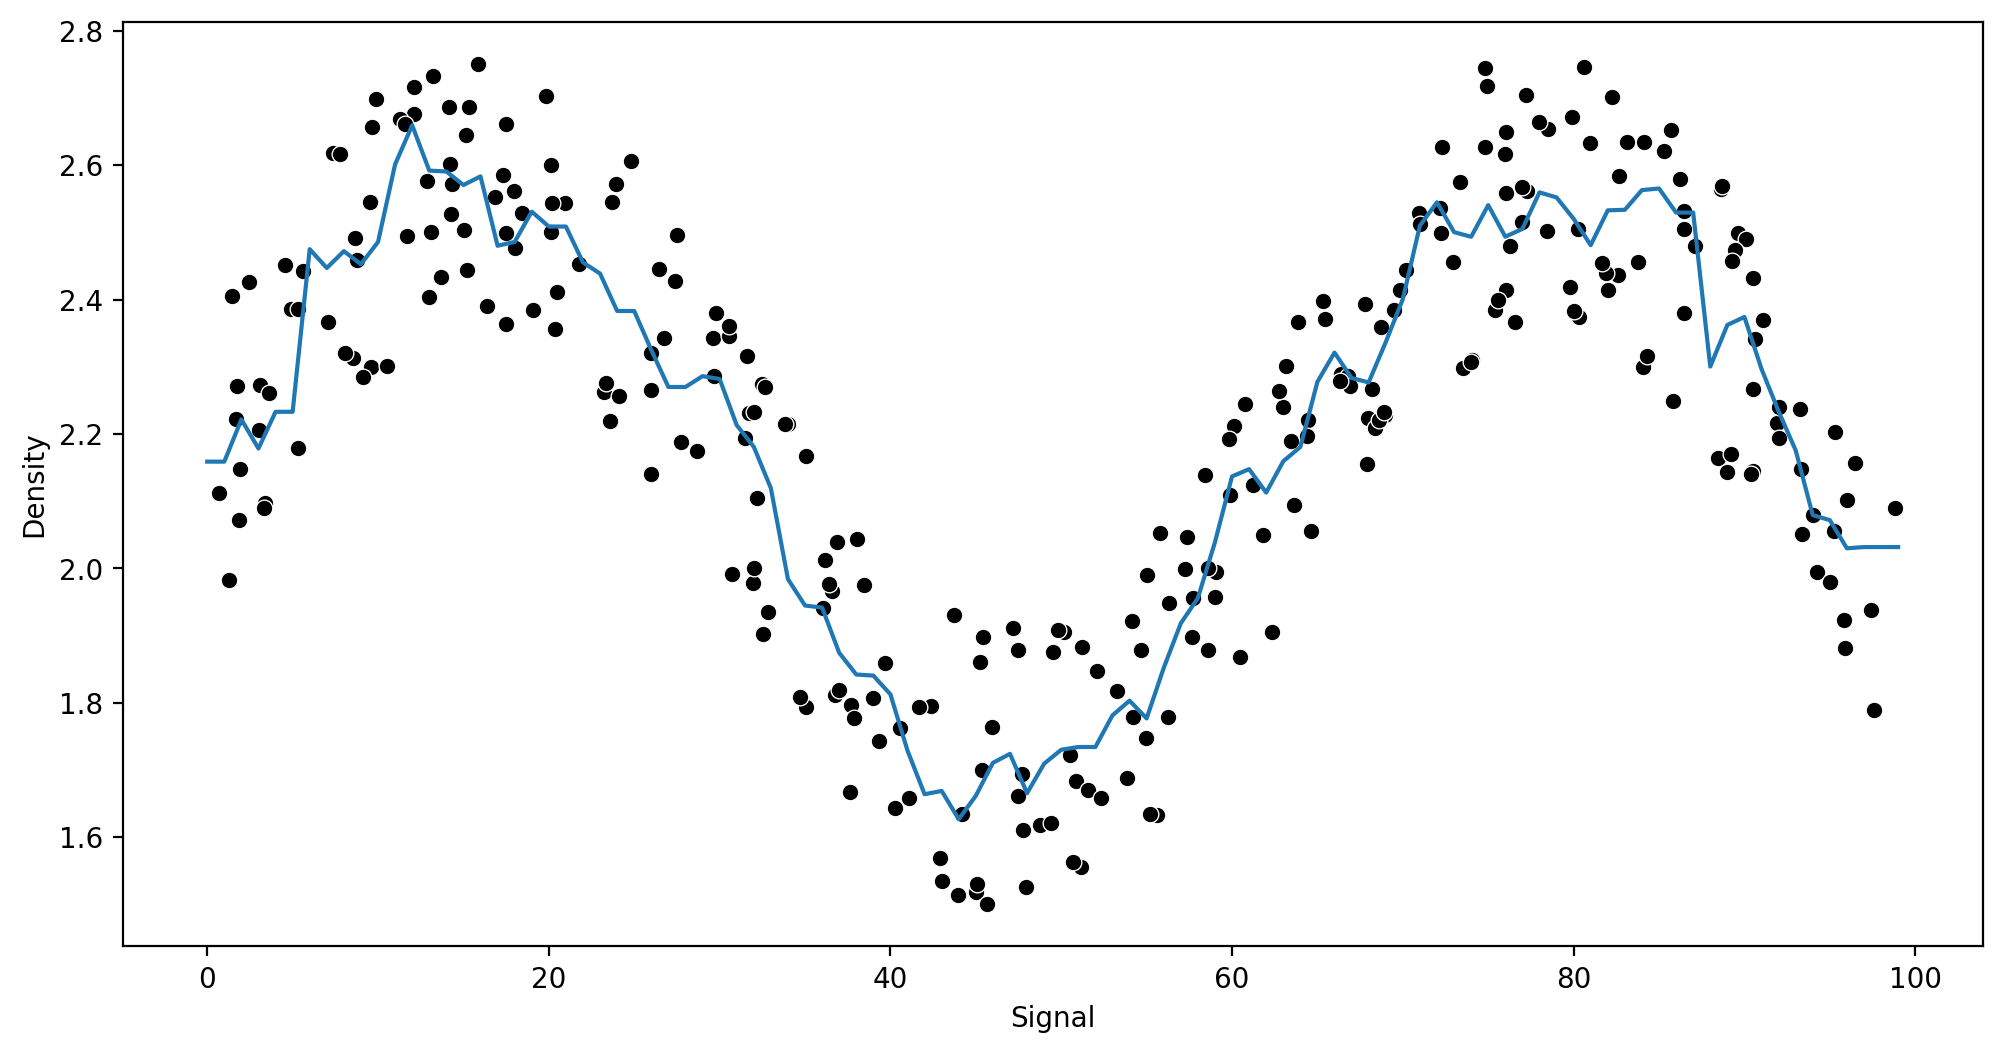

In [70]:
preds = {2,5,10}

for n in preds:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
model = DecisionTreeRegressor()

RMSE : 0.16923540317084135


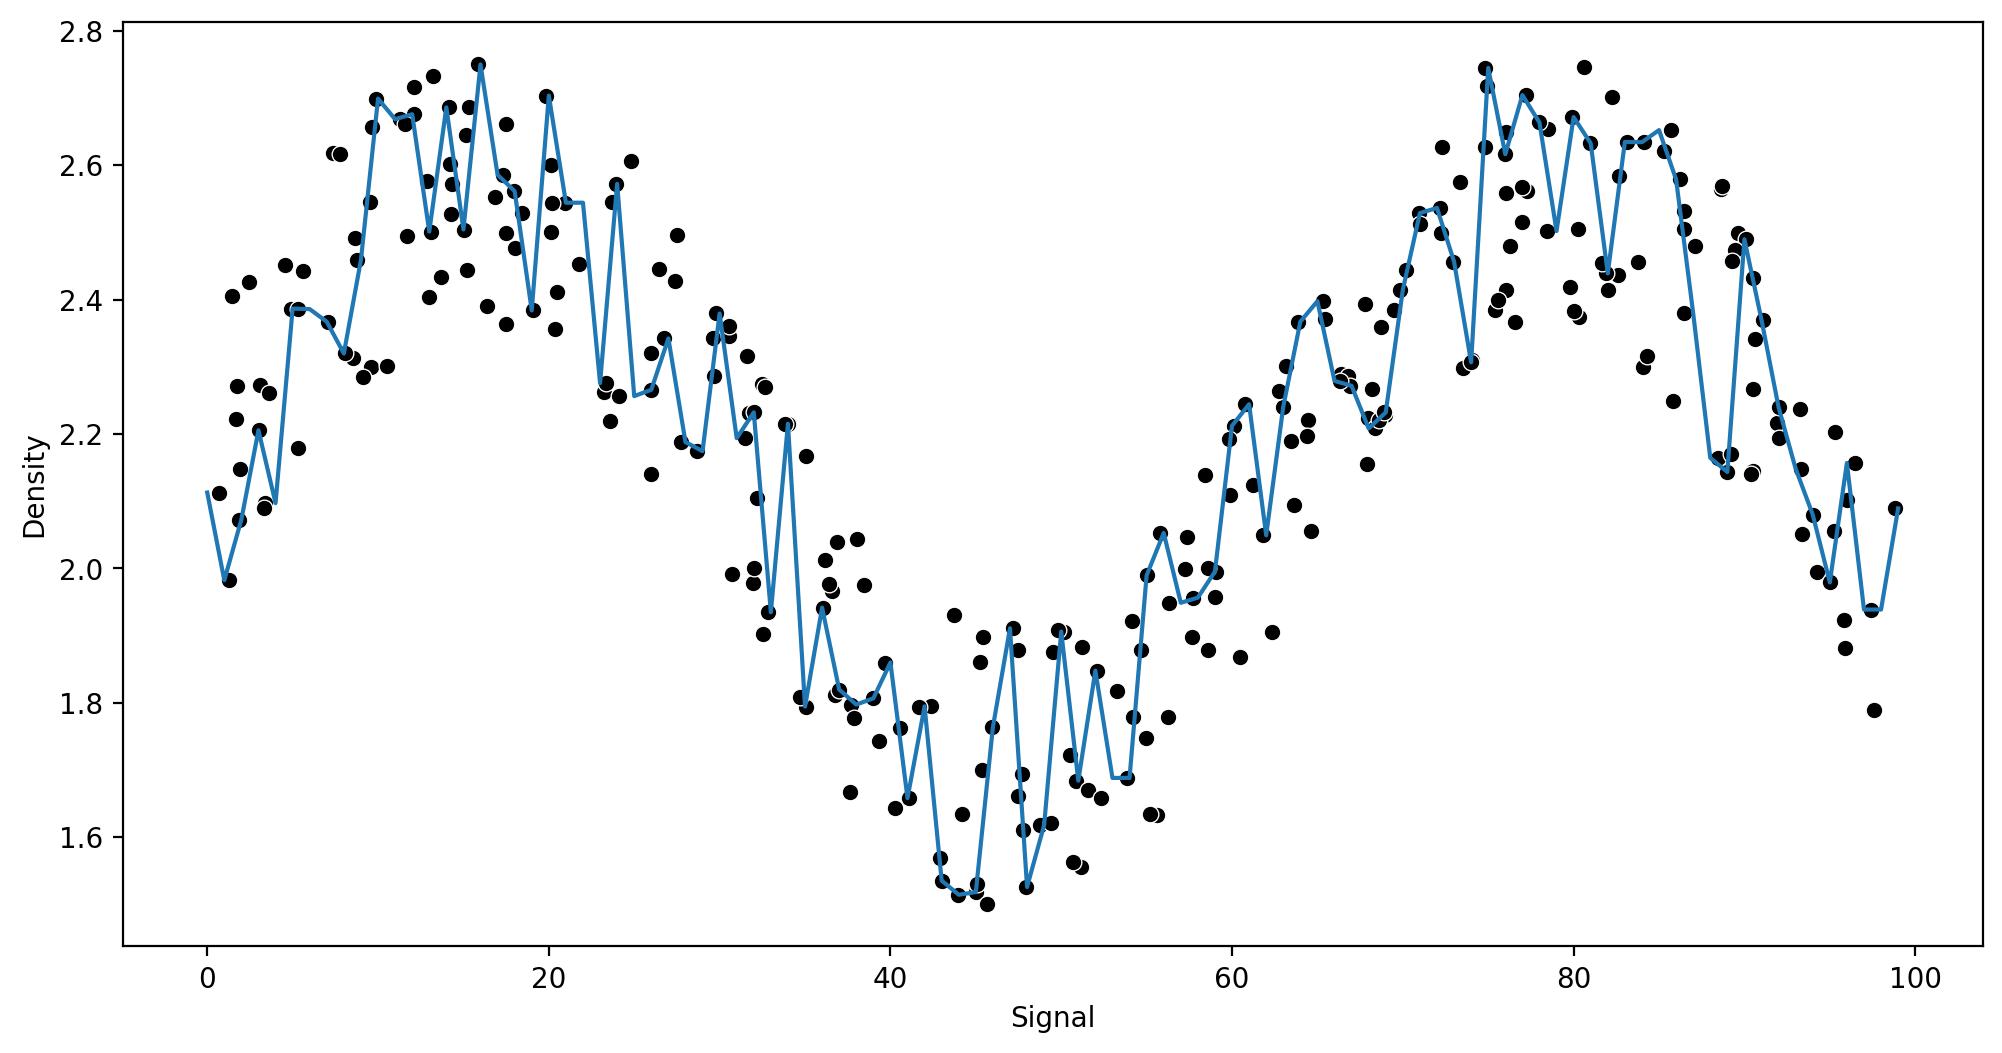

In [73]:
run_model(model,X_train,y_train,X_test,y_test)

In [75]:
model.get_depth()

18

In [77]:
model.get_n_leaves()

201

In [78]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# SVM

In [79]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [80]:
param = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
model = SVR()

In [83]:
grid = GridSearchCV(model,param)

In [84]:
grid.fit(X_test,y_test)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
                         'gamma': ['auto', 'scale']})

In [85]:
grid.best_params_

{'C': 5, 'gamma': 'scale'}

RMSE : 0.13114159777560502


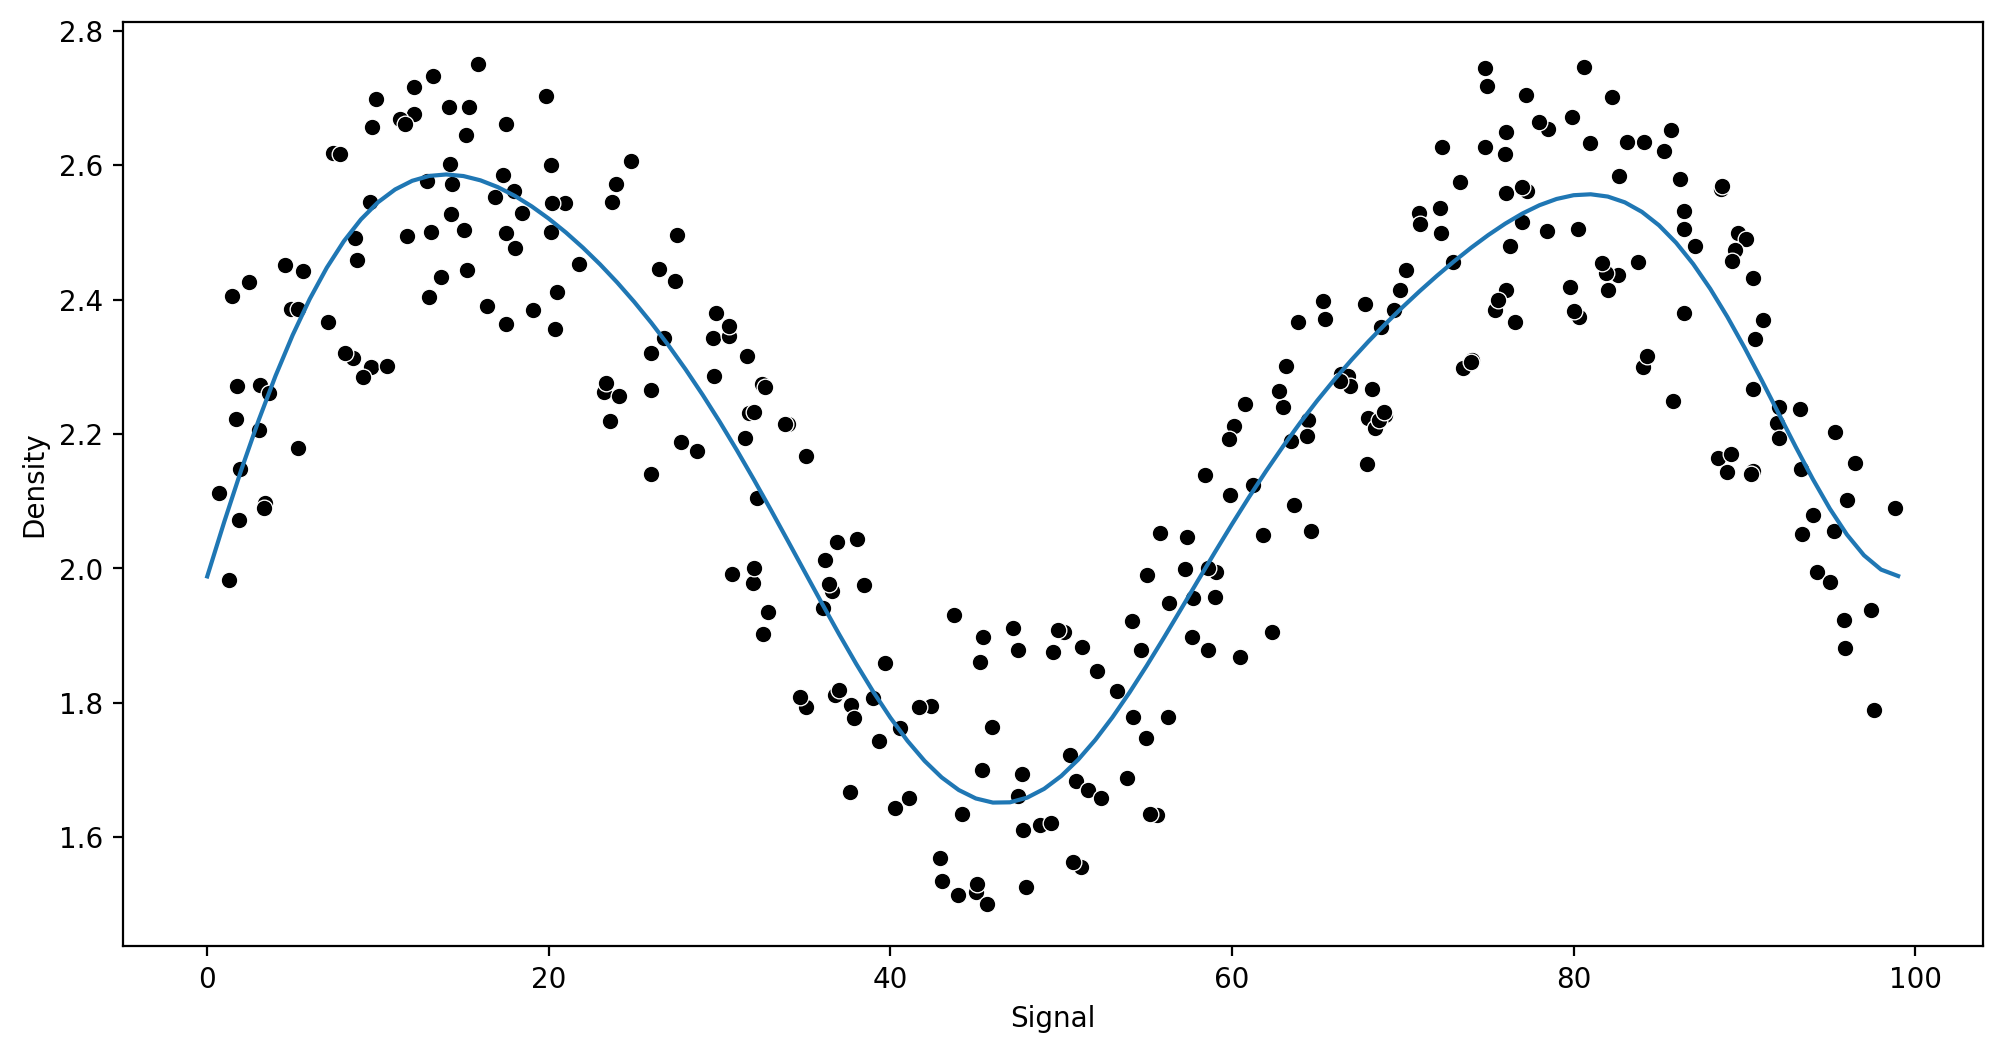

In [86]:
run_model(grid,X_train,y_train,X_test,y_test)

# AdaBoost

In [87]:
from sklearn.ensemble import AdaBoostRegressor

In [88]:
model = AdaBoostRegressor()

RMSE : 0.13753659483662742


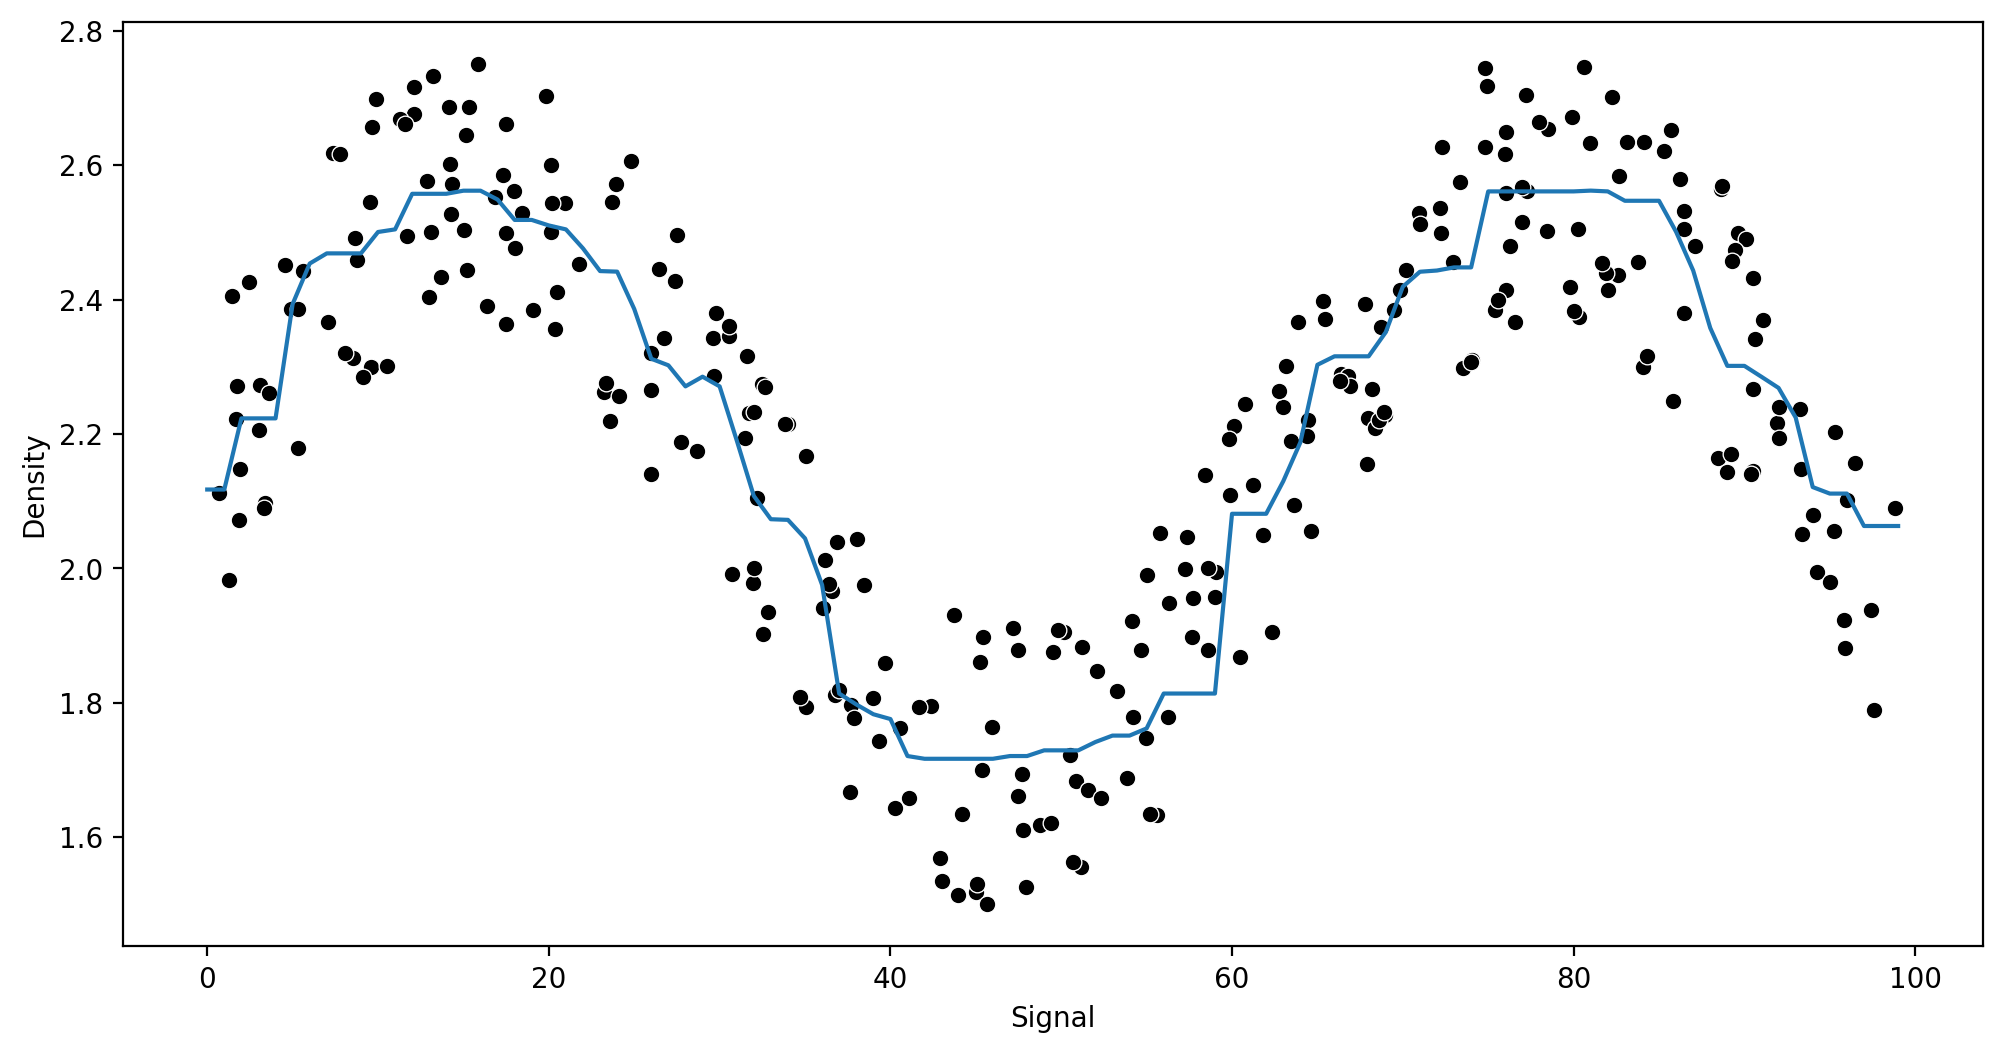

In [89]:
run_model(model,X_train,y_train,X_test,y_test)

# Gradient Boost

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
model = GradientBoostingRegressor()

RMSE : 0.1397753762329958


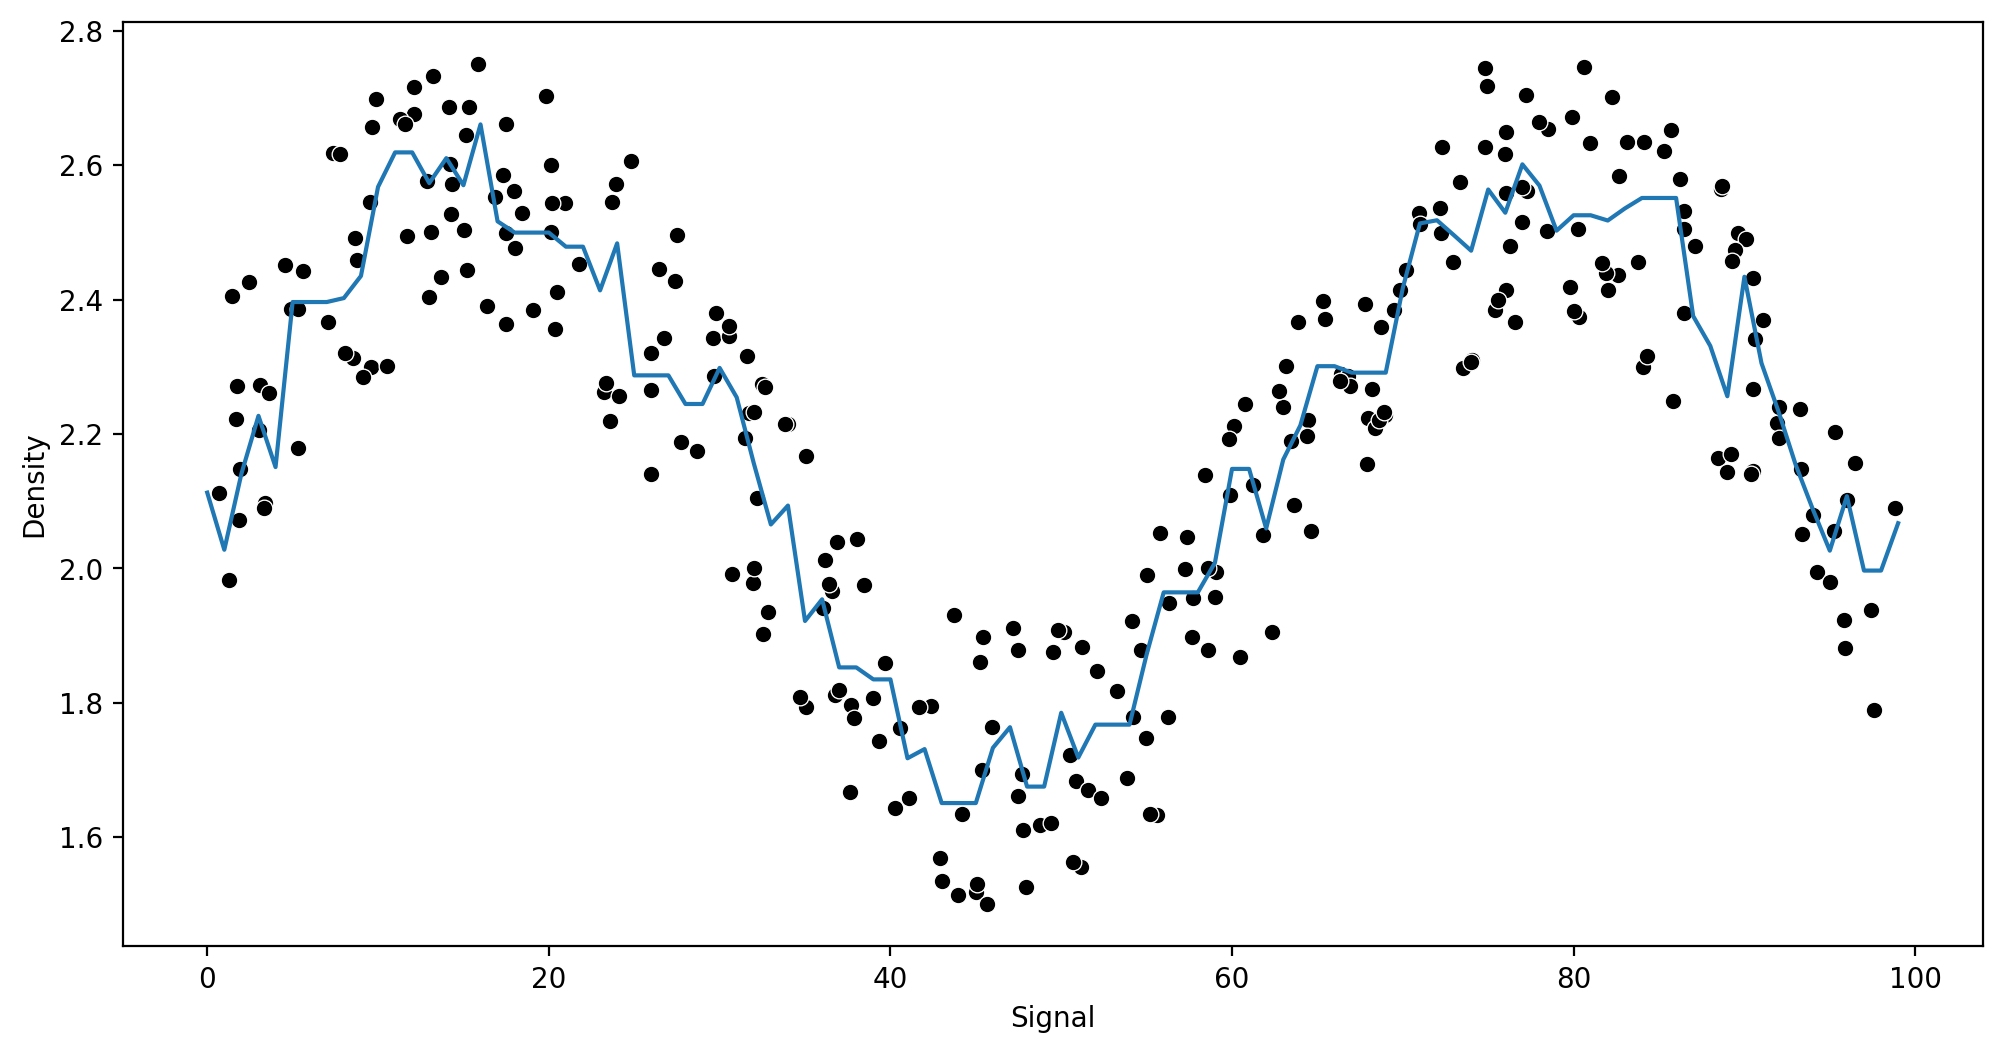

In [123]:
run_model(model,X_train,y_train,X_test,y_test)